In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from utilities_namespace import *

In [2]:
%%capture
%load_ext rpy2.ipython
%R require(ggplot2)

To better understand the CMap 2.0 enrichment score I have answered this question: https://www.biostars.org/p/140821/#364663

Below is the code that I used to reproduce the enrichment score calculation:

In [3]:
from config import DATA_DIR
from pathlib import Path

data_path = Path(DATA_DIR)

Loading the CMap 2.0:

In [4]:
metadata = pd.read_excel(data_path / 'cmap/cmap_instances_02.xls')
substances = metadata[metadata.isna().sum(axis=1) <= 1].dropna(how='all').set_index('instance_id')
substances.head()

,batch_id,cmap_name,INN1,concentration (M),duration (h),...,scanner,vehicle,vendor,catalog_number,catalog_name
instance_id,,,,,,,,,,,
1,1,metformin,INN,1.000000e-05,6.0,...,HP GeneArray Scanner,medium,Sigma-Aldrich,D5035,"1,1-dimethylbiguanide hydrochloride"
2,1,metformin,INN,1.000000e-05,6.0,...,HP GeneArray Scanner,medium,Sigma-Aldrich,D5035,"1,1-dimethylbiguanide hydrochloride"
3,1,metformin,INN,1.000000e-07,6.0,...,HP GeneArray Scanner,medium,Sigma-Aldrich,D5035,"1,1-dimethylbiguanide hydrochloride"
4,1,metformin,INN,1.000000e-03,6.0,...,HP GeneArray Scanner,medium,Sigma-Aldrich,D5035,"1,1-dimethylbiguanide hydrochloride"
21,2,phenformin,INN,1.000000e-05,6.0,...,HP GeneArray Scanner,medium,Sigma-Aldrich,P7045,phenformin hydrochloride


In [5]:
substances.columns

Index(['batch_id', 'cmap_name', 'INN1', 'concentration (M)', 'duration (h)',
       'cell2', 'array3', 'perturbation_scan_id', 'vehicle_scan_id4',
       'scanner', 'vehicle', 'vendor', 'catalog_number', 'catalog_name'],
      dtype='object')

In [6]:
instances_ranks = {
    5941: 174,
    5968: 305,
    5963: 339,
    5936: 368
}

In [7]:
n = 6100
t = len(instances_ranks)

dd = DataFrame([
    {
        'x': j,
        'y': (j +1 ) / t,
        'group': 'j/t',
        'label': f'{i}: {substances.loc[i].cmap_name}\n{substances.loc[i].batch_id} batch, {substances.loc[i].cell2}',
        'case': 'j/t - V(j)/n'
    }
    for j, (i, vj) in enumerate(instances_ranks.items()) 
] + [
    {
        'x': j,
        'y': vj / n,
        'group': 'V(j) / n',
        'label': f'{i}: {substances.loc[i].cmap_name}\n{substances.loc[i].batch_id} batch, {substances.loc[i].cell2}',
        'case': 'j/t - V(j)/n'
    }  
    for j, (i, vj) in enumerate(instances_ranks.items())
] +
[
    {
        'x': j,
        'y': (j) / t,
        'group': '(j-1)/t',
        'label': f'{i}: {substances.loc[i].cmap_name}\n{substances.loc[i].batch_id} batch, {substances.loc[i].cell2}',
        'case': 'V(j)/n - (j-1)/t'
    }
    for j, (i, vj) in enumerate(instances_ranks.items()) 
] + [
    {
        'x': j,
        'y': vj / n,
        'group': 'V(j) / n',
        'label': f'{i}: {substances.loc[i].cmap_name}\n{substances.loc[i].batch_id} batch, {substances.loc[i].cell2}',
        'case': 'V(j)/n - (j-1)/t'
    }  
    for j, (i, vj) in enumerate(instances_ranks.items())
]

)

In [8]:
from numpy import argmax

In [9]:
show_table(dd)

,case,group,label,x,y
0,j/t - V(j)/n,j/t,"5941: H-7\n1007 batch, PC3",0,0.250000
1,j/t - V(j)/n,j/t,"5968: H-7\n1013 batch, PC3",1,0.500000
2,j/t - V(j)/n,j/t,"5963: H-7\n1012 batch, MCF7",2,0.750000
3,j/t - V(j)/n,j/t,"5936: H-7\n1006 batch, MCF7",3,1.000000
4,j/t - V(j)/n,V(j) / n,"5941: H-7\n1007 batch, PC3",0,0.028525
5,j/t - V(j)/n,V(j) / n,"5968: H-7\n1013 batch, PC3",1,0.050000
6,j/t - V(j)/n,V(j) / n,"5963: H-7\n1012 batch, MCF7",2,0.055574
7,j/t - V(j)/n,V(j) / n,"5936: H-7\n1006 batch, MCF7",3,0.060328
8,V(j)/n - (j-1)/t,(j-1)/t,"5941: H-7\n1007 batch, PC3",0,0.000000
9,V(j)/n - (j-1)/t,(j-1)/t,"5968: H-7\n1013 batch, PC3",1,0.250000


In [10]:
1.000000 - 0.060328

0.939672

In [11]:
0.750000 - 0.060328

0.689672

In [12]:
vj_j = [
    vj/n - j/t
    for j, (i, vj) in enumerate(instances_ranks.items())
]
j_vj = [
    (j+1)/t - vj/n
    for j, (i, vj) in enumerate(instances_ranks.items())
]
annotations = DataFrame([{
    'x': argmax(vj_j) + 1 - 0.25,
    'text': f'{max(vj_j) :.4f}',#[vj/n  for j, (i, vj) in enumerate(instances_ranks.items())][argmax(vj_j)]
    'y': max(vj_j) / 2,
    'case': 'V(j)/n - (j-1)/t',
    'group': 'max(V(j)/n - (j-1)/t)'
}, {
    'x': argmax(j_vj) + 1,
    'text': f'{max(j_vj):.4f}',#[vj/n  for j, (i, vj) in enumerate(instances_ranks.items())][argmax(vj_j)]
    'y': max(j_vj)/2,
    'case': 'j/t - V(j)/n',
    'group': 'max(j/t - V(j)/n)'
}
])


annotations

,case,group,text,x,y
0,V(j)/n - (j-1)/t,max(V(j)/n - (j-1)/t),0.0285,0.75,0.014262
1,j/t - V(j)/n,max(j/t - V(j)/n),0.9397,4.00,0.469836


In [13]:
segments =  DataFrame([
    dict(x=4.2, xend=4.2, y=0.060328, yend=1, group='max(j/t - V(j)/n)', label='', case='j/t - V(j)/n', color='max(j/t - V(j)/n)'),
    dict(x=.92, xend=.92, y=0, yend=0.028525, group='max(V(j)/n - (j-1)/t)', label='', case='V(j)/n - (j-1)/t', color='max(V(j)/n - (j-1)/t)')
])

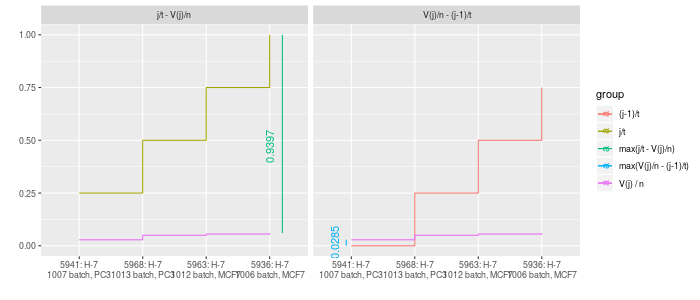

In [14]:
%%R -i dd -i annotations -w 700 -i segments -h 300
dd$label <- reorder(dd$label, dd$x)
(
    ggplot(dd, aes(x=label, y=y, group=group, color=group))
    + geom_step()
    + facet_wrap(. ~ case)
    + geom_segment(aes(x=x, y=y,xend=xend,yend=yend,color=color, group=group), data=segments)
    + geom_text(aes(x=x, y=y, label=text, group=-Inf), data=annotations, angle=90)
    + xlab('')
    +ylab('')
)

In [15]:
vj = (Series([174, 305, 339, 368]) / 6100)

In [16]:
j = Series(range(1,5)) / 4

In [17]:
j

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [18]:
', '.join((j - vj).apply(lambda x: f'{x:.4f}').tolist())

'0.2215, 0.4500, 0.6944, 0.9397'